# Customer Churn Prediction

---



## 1. Data Preprocessing

In [1]:
# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Load and display the dataset
data = pd.read_excel('customer_churn_large_dataset.xlsx')
data

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1


The dataset has 100000 rows and 9 columns.

In [3]:
# Get information about the datatypes of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


The dataset has 6 numerical and 3 categorical variables.

In [4]:
# Check for missing values in the dataset
data.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

There are no null values in the dataset.

In [5]:
# Check for duplicate values
data.duplicated().sum()

0

There are no duplicate records in the datset.

In [6]:
# Get a statistical summary of numerical variables

data.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [7]:
# Ger a statistical summary of categoical variables

data.describe(include=['object'])

,Name,Gender,Location
count,100000,100000,100000
unique,100000,2,5
top,Customer_1,Female,Houston
freq,1,50216,20157


In [10]:
# Identify numerical columns where you want to check for outliers
numerical_columns = ['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']

# Function to detect and address outliers using the IQR method
def handle_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify and remove outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    data = data[~data.index.isin(outliers.index)]

    return data

# Apply outlier detection and removal to numerical columns
for column in numerical_columns:
    data = handle_outliers(data, column)

In [11]:
# Print the dataset after addressing the outliers
data

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1


The dataset remains the same indicating there were no outliers.

In [12]:
# Dropping unncecessary columns
data.drop(columns=['CustomerID', 'Name'],axis=1,inplace=True)

In [13]:
# Feature Encoding

categorical_columns = data.select_dtypes(include=['object']).columns
categorical_columns

Index(['Gender', 'Location'], dtype='object')

There are two variables which needs to be encoded.

In [14]:
from sklearn.preprocessing import LabelEncoder

data['Gender'] = LabelEncoder().fit_transform(data['Gender'])
data['Location'] = LabelEncoder().fit_transform(data['Location'])

In [15]:
# Print the data after Label Encoding
data

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,1,2,17,73.36,236,0
1,62,0,4,1,48.76,172,0
2,24,0,2,5,85.47,460,0
3,36,0,3,3,97.94,297,1
4,46,0,3,19,58.14,266,0
...,...,...,...,...,...,...,...
99995,33,1,1,23,55.13,226,1
99996,62,0,4,19,61.65,351,0
99997,64,1,0,17,96.11,251,1
99998,51,0,4,20,49.25,434,1


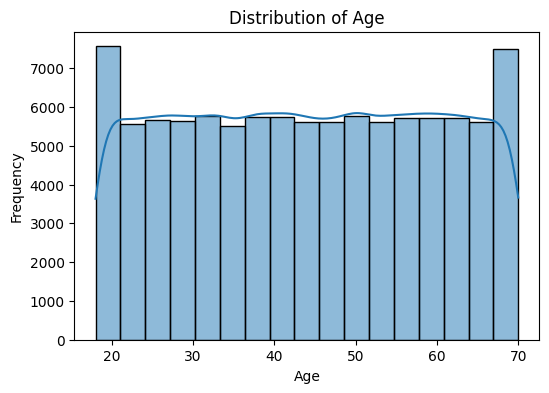

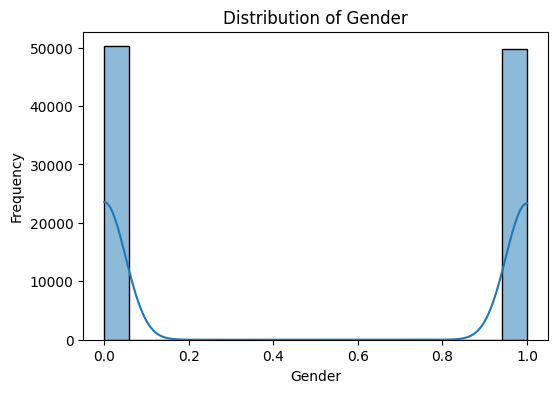

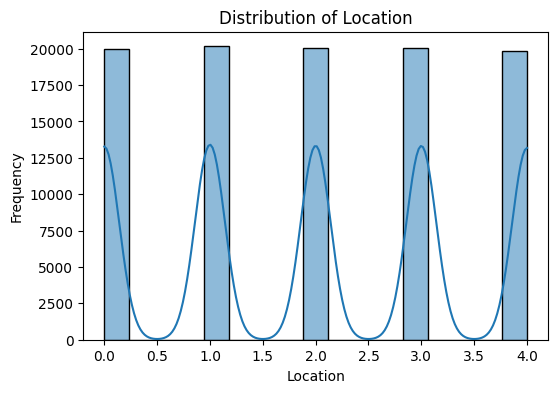

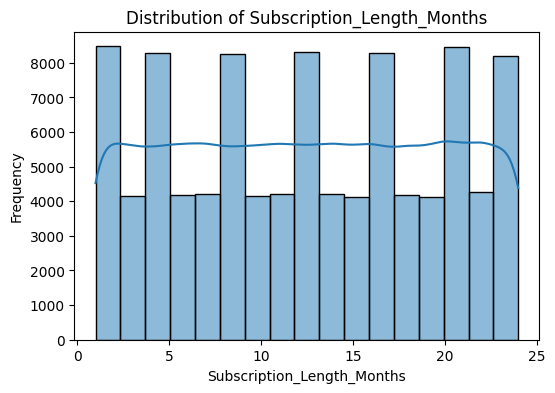

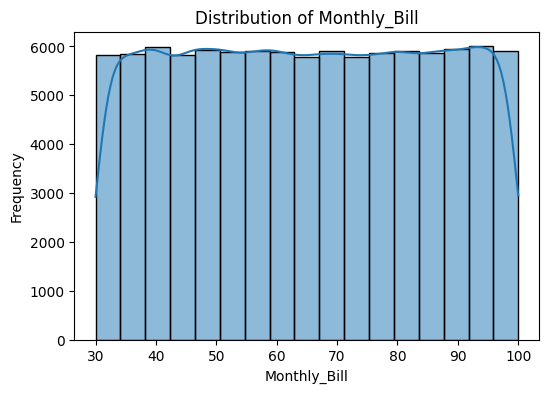

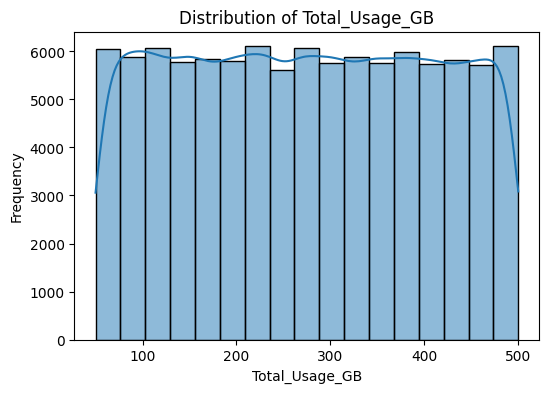

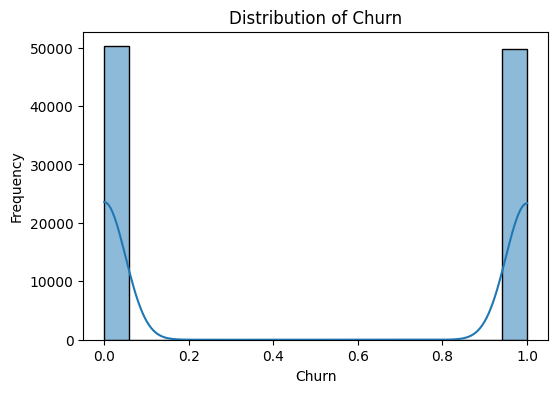

In [16]:
# Check distribution of all variables
vars = data.select_dtypes(include=['float64', 'int64']).columns

# Plot the distribution of each continuous variable
for var in vars:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=data, x=var, bins=17, kde=True)
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {var}')
    plt.show()

All variables are uniformly distributed.

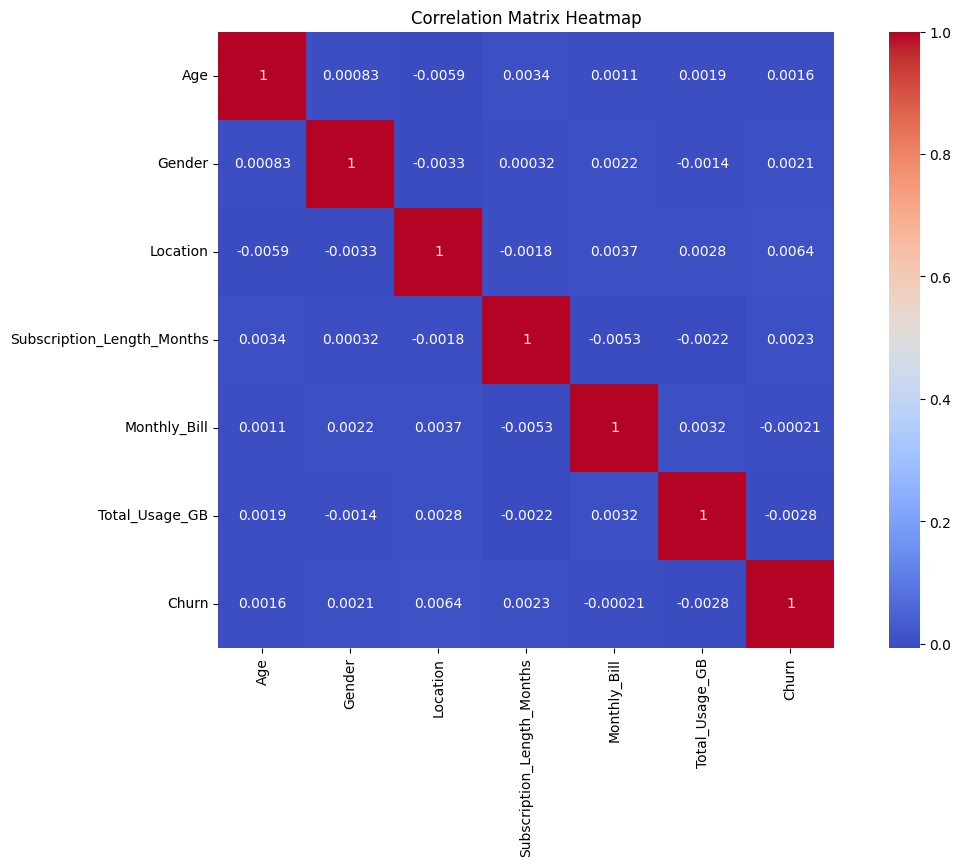

In [18]:
# Checking colinearity between variables

corr_matrix = data.corr()

plt.figure(figsize=(14,8)) #(width,height)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

No pair of variable is highly corrleated.

## 2. Feature Generation

In [26]:
# Feature Engineering
data['Age_Group'] = pd.cut(data['Age'], bins=[0, 30, 60, 100], labels=['Young', 'Middle-aged', 'Senior'])
data['Tenure_Years'] = data['Subscription_Length_Months'] / 12
data['Billing_to_Usage_Ratio'] = data['Monthly_Bill'] / data['Total_Usage_GB']
data['Usage_Per_Billing_Cycle'] = data['Total_Usage_GB'] / data['Subscription_Length_Months']
data['Churn_History_Count'] = data.groupby('Age')['Churn'].transform('cumsum')

Here are the features generated in the code above:

1. **Age Group:** This feature categorizes customers into age groups such as "Young," "Middle-aged," and "Senior" based on predefined age bins.

2. **Tenure in Years:** It calculates the customer's tenure in years by dividing the "Subscription_Length_Months" by 12, providing a more interpretable measure of the customer's relationship with the service.

3. **Billing to Usage Ratio:** This feature represents the ratio of the customer's monthly bill to their total usage, helping to identify customers who may not be using the service efficiently.

4. **Usage per Billing Cycle:** It calculates the average usage per billing cycle by dividing "Total_Usage_GB" by "Subscription_Length_Months," providing insight into the customer's usage behavior.

5. **Churn History Count:** This feature tracks the cumulative count of churn events for each customer based on their age, revealing how many times a customer has churned in the past.

These features aim to capture various aspects of customer behavior, tenure, and churn history, which can be valuable for building a predictive model for customer churn. They provide different dimensions of information that may be relevant in understanding and predicting churn patterns.

In [35]:
# Encoding age group

data['Age_Group'] = LabelEncoder().fit_transform(data['Age_Group'])

In [44]:
# Print dataset after Feature Engineering
data

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Age_Group,Tenure_Years,Billing_to_Usage_Ratio,Usage_Per_Billing_Cycle,Churn_History_Count,Churn
0,63,1,2,17,73.36,236,1,1.416667,0.310847,13.882353,0,0
1,62,0,4,1,48.76,172,1,0.083333,0.283488,172.000000,0,0
2,24,0,2,5,85.47,460,2,0.416667,0.185804,92.000000,0,0
3,36,0,3,3,97.94,297,0,0.250000,0.329764,99.000000,1,1
4,46,0,3,19,58.14,266,0,1.583333,0.218571,14.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,33,1,1,23,55.13,226,0,1.916667,0.243938,9.826087,1050,1
99996,62,0,4,19,61.65,351,1,1.583333,0.175641,18.473684,947,0
99997,64,1,0,17,96.11,251,1,1.416667,0.382908,14.764706,905,1
99998,51,0,4,20,49.25,434,0,1.666667,0.113479,21.700000,963,1


In [45]:
# Split data into features (X) and target (y)
X = data.drop('Churn', axis=1)
y = data['Churn']

In [46]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We take 80% data for training and 20% for testing.

In [47]:
X_train.shape, y_train.shape

((80000, 11), (80000,))

In [49]:
X_test.shape, y_test.shape

((20000, 11), (20000,))

In [50]:
from sklearn.preprocessing import MinMaxScaler

# Define the columns to be scaled
columns_to_scale = ['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the selected columns
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = scaler.fit_transform(X_test[columns_to_scale])

In [51]:
X_train.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Age_Group,Tenure_Years,Billing_to_Usage_Ratio,Usage_Per_Billing_Cycle,Churn_History_Count
75220,0.692308,0,4,0.173913,0.778571,0.344444,0,0.416667,0.412195,41.000000,754
48955,0.192308,1,4,1.000000,0.743714,0.420000,2,2.000000,0.343347,9.958333,488
44966,0.750000,1,0,0.478261,0.318429,0.026667,0,1.000000,0.843387,5.166667,461
13568,0.019231,1,1,0.782609,0.036714,0.273333,2,1.583333,0.188266,9.105263,127
92727,0.730769,0,3,0.304348,0.050286,0.586667,0,0.666667,0.106752,39.250000,809


In [52]:
X_test.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Age_Group,Tenure_Years,Billing_to_Usage_Ratio,Usage_Per_Billing_Cycle,Churn_History_Count
75721,0.576923,0,1,0.434783,0.835405,0.982222,0,0.916667,0.179837,44.727273,698
80184,0.596154,1,4,0.521739,0.151450,0.828889,0,1.083333,0.096005,32.538462,724
19864,0.250000,0,2,0.173913,0.042863,0.502222,0,0.416667,0.119601,55.200000,196
76699,0.673077,1,4,0.130435,0.923703,0.642222,0,0.333333,0.279233,84.750000,738
92991,0.096154,0,2,1.000000,0.745821,0.564444,2,2.000000,0.270428,12.666667,862


In [55]:
# Feature Selection using Random Forest Feature Importance Method
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_jobs=-1, random_state=42)

rf_classifier.fit(X_train, y_train)

importances = rf_classifier.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

feature_importance_df

,Feature,Importance
0,Churn_History_Count,0.152454
1,Monthly_Bill,0.149973
2,Billing_to_Usage_Ratio,0.147522
3,Usage_Per_Billing_Cycle,0.137945
4,Total_Usage_GB,0.129485
5,Age,0.107590
6,Tenure_Years,0.050268
7,Subscription_Length_Months,0.050161
8,Location,0.042758
9,Gender,0.019041


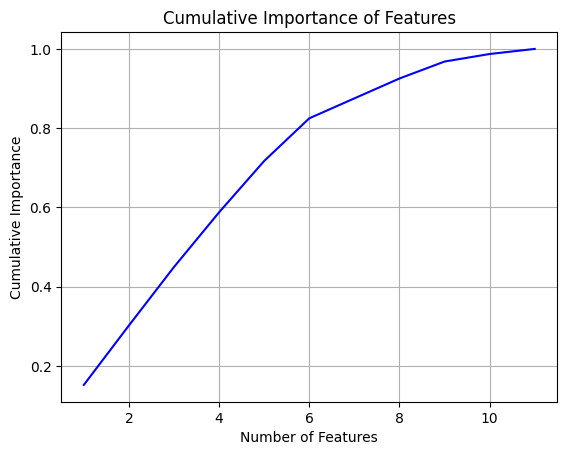

In [56]:
# Checking optimal number of features

sorted_indices = np.argsort(importances)[::-1]
cumulative_importance = np.cumsum(importances[sorted_indices])

plt.plot(range(1, len(importances) + 1), cumulative_importance, 'b-')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance')
plt.title('Cumulative Importance of Features')
plt.grid(True)
plt.show()

The graph shows that only 8 variables are important for the analysis. These variables are:

* Churn_History_Count
* Monthly_Bill
* Billing_to_Usage_Ratio
* Usage_Per_Billing_Cycle
* Total_Usage_GB
* Age
* Tenure_Years
*	Subscription_Length_Months


* These 8 variables together account for approximately 96% of the importance for the analysis. This means that they are the most important variables to consider when trying to predict customer churn.

In [57]:
# Checking multicolinearity of X_train

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["Variable"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif = vif.sort_values(by='VIF', ascending=False)

vif

,Variable,VIF
7,Tenure_Years,7168.793410
3,Subscription_Length_Months,6478.340715
8,Billing_to_Usage_Ratio,3.297964
5,Total_Usage_GB,3.004704
9,Usage_Per_Billing_Cycle,1.780038
4,Monthly_Bill,1.468399
6,Age_Group,1.248958
0,Age,1.248901
10,Churn_History_Count,1.000130
2,Location,1.000089


The training data contains multicollinearity because Tenure_Years and Subscription_Length_Months the have a VIF value way more than 5. So, out of the 8 features that we were going to use, we will drop Subscription_Length_Months and use Location which is the next most important feature.

In [58]:
# Define the selected feature columns
selected_features = [
    'Churn_History_Count',
    'Monthly_Bill',
    'Billing_to_Usage_Ratio',
    'Usage_Per_Billing_Cycle',
    'Total_Usage_GB',
    'Age',
    'Tenure_Years',  # Keep one of the correlated features
    'Location'  # Replace Subscription_Length_Months with Location
]

# Update X_train and X_test to include only the selected features
X_train = X_train[selected_features]
X_test = X_test[selected_features]

## 3. Model Building: Machine Learning Algorithms

In [59]:
#importing algorithms, metrics and time

import time

from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier

In [60]:
algorithms = [
    LogisticRegression(n_jobs=-1, random_state=42),
    DecisionTreeClassifier(random_state=42),
    KNeighborsClassifier(n_jobs=-1),
    GaussianNB(),
    AdaBoostClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    RandomForestClassifier(n_jobs=-1, random_state=42),
    XGBClassifier(n_jobs=-1, random_state=42),
    SVC(random_state=42)
]

# Initialize the results dictionary for training data
results_train = {
    'Algorithm': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': [],
    'Building Time (s)': []
}

# Apply the algorithms and calculate performance metrics for training data
for algorithm in algorithms:
    start_time = time.time()  # Start timer

    algorithm_name = type(algorithm).__name__
    algorithm.fit(X_train, y_train)
    y_train_pred = algorithm.predict(X_train)

    accuracy = accuracy_score(y_train, y_train_pred)
    precision = precision_score(y_train, y_train_pred, average='weighted')
    recall = recall_score(y_train, y_train_pred, average='weighted')
    f1 = f1_score(y_train, y_train_pred, average='weighted')

    end_time = time.time()  # End timer
    building_time = end_time - start_time

    results_train['Algorithm'].append(algorithm_name)
    results_train['Accuracy'].append(accuracy)
    results_train['Precision'].append(precision)
    results_train['Recall'].append(recall)
    results_train['F1-score'].append(f1)
    results_train['Building Time (s)'].append(building_time)

# Create a dataframe for the training data results
df_train = pd.DataFrame(results_train)
df_train

,Algorithm,Accuracy,Precision,Recall,F1-score,Building Time (s)
0,LogisticRegression,0.503238,0.503039,0.503238,0.500175,1.934268
1,DecisionTreeClassifier,1.000000,1.000000,1.000000,1.000000,1.874611
2,KNeighborsClassifier,0.687375,0.687376,0.687375,0.687367,6.280308
3,GaussianNB,0.504487,0.504456,0.504487,0.485971,0.283656
4,AdaBoostClassifier,0.518725,0.518750,0.518725,0.517327,4.954256
5,GradientBoostingClassifier,0.537075,0.537565,0.537075,0.534740,18.377644
6,RandomForestClassifier,1.000000,1.000000,1.000000,1.000000,28.024447
7,XGBClassifier,0.651563,0.651907,0.651563,0.651296,7.335256
8,SVC,0.503925,0.505431,0.503925,0.431035,754.212243


* Decision Tree and Random Forest achieved perfect accuracy on the training data, suggesting potential overfitting.


* Logistic Regression, GaussianNB, Gradient Boosting and AdaBoost have relatively low accuracy and F1-score.


* KNeighborsClassifier and XGBClassifier have moderate accuracy and F1-score.


* SVC has low accuracy but high building time.

In [61]:
results_test = {
    'Algorithm': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': []
}

# Apply the algorithms and calculate performance metrics for test data
for algorithm in algorithms:
    algorithm_name = type(algorithm).__name__
    y_test_pred = algorithm.predict(X_test)

    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')

    results_test['Algorithm'].append(algorithm_name)
    results_test['Accuracy'].append(accuracy)
    results_test['Precision'].append(precision)
    results_test['Recall'].append(recall)
    results_test['F1-score'].append(f1)

# Create a dataframe for the test data results
df_test = pd.DataFrame(results_test)
df_test

,Algorithm,Accuracy,Precision,Recall,F1-score
0,LogisticRegression,0.50390,0.503375,0.50390,0.500633
1,DecisionTreeClassifier,0.49645,0.496449,0.49645,0.496449
2,KNeighborsClassifier,0.49400,0.493994,0.49400,0.493996
3,GaussianNB,0.50600,0.505274,0.50600,0.486792
4,AdaBoostClassifier,0.50210,0.501707,0.50210,0.500532
5,GradientBoostingClassifier,0.50455,0.504109,0.50455,0.502186
6,RandomForestClassifier,0.50285,0.502697,0.50285,0.502571
7,XGBClassifier,0.49920,0.499004,0.49920,0.498805
8,SVC,0.50370,0.501817,0.50370,0.431097


* Most algorithms have mediocre performance on the test data, with accuracy close to random guessing (around 0.5).

* No algorithm is performing well.

Let's try making a neural network model.

In [64]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Dense, BatchNormalization, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import recall_score

In [65]:
# Define the EarlyStopping and ModelCheckpoint callbacks

early_stopping = EarlyStopping(
    monitor='val_loss',        # The metric to monitor. This is usually the validation loss.
    min_delta=0.001,           # The minimum amount of improvement required to consider the model to have improved.
    patience=10,               # The number of epochs to wait without improvement before stopping the training.
    verbose=1,                 # Print output
    mode='auto',               # Consider mode of the metric as min or max.
    restore_best_weights=True  # Whether to restore the model weights at the epoch with the best validation loss.
)

In [66]:
checkpoint = ModelCheckpoint('ChurnClassifier.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

### Architecture 1

In [67]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model]
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [68]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.3, callbacks=[early_stopping, checkpoint],
                    verbose=1)

Epoch 1/100
422/438 [===========================>..] - ETA: 0s - loss: 0.9652 - accuracy: 0.4966
Epoch 1: val_loss improved from inf to 0.75024, saving model to ChurnClassifier.h5
438/438 [==============================] - 3s 4ms/step - loss: 0.9577 - accuracy: 0.4964 - val_loss: 0.7502 - val_accuracy: 0.4953
Epoch 2/100
 51/438 [==>...........................] - ETA: 0s - loss: 0.7559 - accuracy: 0.5103

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


426/438 [============================>.] - ETA: 0s - loss: 0.7967 - accuracy: 0.5010
Epoch 2: val_loss did not improve from 0.75024
438/438 [==============================] - 1s 3ms/step - loss: 0.7992 - accuracy: 0.5005 - val_loss: 0.7939 - val_accuracy: 0.5027
Epoch 3/100
429/438 [============================>.] - ETA: 0s - loss: 0.7674 - accuracy: 0.4991
Epoch 3: val_loss improved from 0.75024 to 0.71438, saving model to ChurnClassifier.h5
438/438 [==============================] - 2s 4ms/step - loss: 0.7666 - accuracy: 0.4990 - val_loss: 0.7144 - val_accuracy: 0.4955
Epoch 4/100
427/438 [============================>.] - ETA: 0s - loss: 0.7503 - accuracy: 0.4991
Epoch 4: val_loss improved from 0.71438 to 0.70370, saving model to ChurnClassifier.h5
438/438 [==============================] - 2s 4ms/step - loss: 0.7503 - accuracy: 0.4993 - val_loss: 0.7037 - val_accuracy: 0.5032
Epoch 5/100
436/438 [============================>.] - ETA: 0s - loss: 0.7753 - accuracy: 0.5019
Epoch 5: v

### Architecture 2

In [71]:
model = Sequential()

# layers
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 6))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compile the model]
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [72]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.3, callbacks=[early_stopping, checkpoint],
                    verbose=1)

Epoch 1/100
423/438 [===========================>..] - ETA: 0s - loss: 0.6931 - accuracy: 0.5025
Epoch 1: val_loss improved from 0.69572 to 0.69333, saving model to ChurnClassifier.h5
438/438 [==============================] - 3s 4ms/step - loss: 0.6932 - accuracy: 0.5015 - val_loss: 0.6933 - val_accuracy: 0.4956
Epoch 2/100
 71/438 [===>..........................] - ETA: 0s - loss: 0.6932 - accuracy: 0.5043

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


422/438 [===========================>..] - ETA: 0s - loss: 0.6931 - accuracy: 0.5048
Epoch 2: val_loss improved from 0.69333 to 0.69317, saving model to ChurnClassifier.h5
438/438 [==============================] - 1s 3ms/step - loss: 0.6931 - accuracy: 0.5042 - val_loss: 0.6932 - val_accuracy: 0.4956
Epoch 3/100
426/438 [============================>.] - ETA: 0s - loss: 0.6931 - accuracy: 0.5022
Epoch 3: val_loss did not improve from 0.69317
438/438 [==============================] - 1s 3ms/step - loss: 0.6931 - accuracy: 0.5028 - val_loss: 0.6933 - val_accuracy: 0.4956
Epoch 4/100
421/438 [===========================>..] - ETA: 0s - loss: 0.6931 - accuracy: 0.5044
Epoch 4: val_loss did not improve from 0.69317
438/438 [==============================] - 1s 3ms/step - loss: 0.6931 - accuracy: 0.5044 - val_loss: 0.6933 - val_accuracy: 0.4956
Epoch 5/100
434/438 [============================>.] - ETA: 0s - loss: 0.6931 - accuracy: 0.5040
Epoch 5: val_loss did not improve from 0.69317
438

### Architecture 3

In [74]:
# Initialising the NN
model = Sequential()

# layers
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 6))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
from keras.optimizers import SGD

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [75]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.3, callbacks=[early_stopping, checkpoint],
                    verbose=1)

Epoch 1/100
418/438 [===========================>..] - ETA: 0s - loss: 0.6931 - accuracy: 0.5040
Epoch 1: val_loss improved from 0.69317 to 0.69316, saving model to ChurnClassifier.h5
438/438 [==============================] - 3s 4ms/step - loss: 0.6931 - accuracy: 0.5037 - val_loss: 0.6932 - val_accuracy: 0.5005
Epoch 2/100
 51/438 [==>...........................] - ETA: 1s - loss: 0.6933 - accuracy: 0.4936

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


422/438 [===========================>..] - ETA: 0s - loss: 0.6931 - accuracy: 0.5026
Epoch 2: val_loss did not improve from 0.69316
438/438 [==============================] - 1s 3ms/step - loss: 0.6931 - accuracy: 0.5032 - val_loss: 0.6934 - val_accuracy: 0.4956
Epoch 3/100
431/438 [============================>.] - ETA: 0s - loss: 0.6931 - accuracy: 0.5046
Epoch 3: val_loss did not improve from 0.69316
438/438 [==============================] - 1s 3ms/step - loss: 0.6931 - accuracy: 0.5044 - val_loss: 0.6933 - val_accuracy: 0.4956
Epoch 4/100
416/438 [===========================>..] - ETA: 0s - loss: 0.6931 - accuracy: 0.5044
Epoch 4: val_loss did not improve from 0.69316
438/438 [==============================] - 1s 3ms/step - loss: 0.6931 - accuracy: 0.5044 - val_loss: 0.6933 - val_accuracy: 0.4956
Epoch 5/100
427/438 [============================>.] - ETA: 0s - loss: 0.6931 - accuracy: 0.5047
Epoch 5: val_loss did not improve from 0.69316
438/438 [==============================] - 

### Architecture 4

In [76]:
model = Sequential()

# Input layer with BatchNormalization and Activation (ReLU)
model.add(Dense(10, input_dim=6, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# First hidden layer with BatchNormalization, Activation (ReLU), and Dropout
model.add(Dense(10, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))  # 20% dropout

# Second hidden layer with BatchNormalization, Activation (ReLU), and Dropout
model.add(Dense(5, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))  # 10% dropout

# Output layer with Sigmoid activation
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [77]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.3, callbacks=[early_stopping, checkpoint],
                    verbose=1)

Epoch 1/100
425/438 [============================>.] - ETA: 0s - loss: 0.7186 - accuracy: 0.5038
Epoch 1: val_loss did not improve from 0.69316
438/438 [==============================] - 7s 5ms/step - loss: 0.7181 - accuracy: 0.5036 - val_loss: 0.6936 - val_accuracy: 0.4993
Epoch 2/100
428/438 [============================>.] - ETA: 0s - loss: 0.6990 - accuracy: 0.5026
Epoch 2: val_loss did not improve from 0.69316
438/438 [==============================] - 2s 4ms/step - loss: 0.6988 - accuracy: 0.5033 - val_loss: 0.6935 - val_accuracy: 0.5018
Epoch 3/100
426/438 [============================>.] - ETA: 0s - loss: 0.6969 - accuracy: 0.4990
Epoch 3: val_loss did not improve from 0.69316
438/438 [==============================] - 2s 4ms/step - loss: 0.6969 - accuracy: 0.4984 - val_loss: 0.6935 - val_accuracy: 0.5002
Epoch 4/100
427/438 [============================>.] - ETA: 0s - loss: 0.6950 - accuracy: 0.4988
Epoch 4: val_loss did not improve from 0.69316
438/438 [======================

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


433/438 [============================>.] - ETA: 0s - loss: 0.6941 - accuracy: 0.5016
Epoch 6: val_loss did not improve from 0.69309
438/438 [==============================] - 3s 7ms/step - loss: 0.6941 - accuracy: 0.5015 - val_loss: 0.6932 - val_accuracy: 0.4992
Epoch 7/100
434/438 [============================>.] - ETA: 0s - loss: 0.6937 - accuracy: 0.4960
Epoch 7: val_loss did not improve from 0.69309
438/438 [==============================] - 2s 4ms/step - loss: 0.6937 - accuracy: 0.4963 - val_loss: 0.6933 - val_accuracy: 0.4991
Epoch 8/100
431/438 [============================>.] - ETA: 0s - loss: 0.6933 - accuracy: 0.4982
Epoch 8: val_loss did not improve from 0.69309
438/438 [==============================] - 2s 4ms/step - loss: 0.6933 - accuracy: 0.4984 - val_loss: 0.6931 - val_accuracy: 0.4981
Epoch 9/100
436/438 [============================>.] - ETA: 0s - loss: 0.6934 - accuracy: 0.5001
Epoch 9: val_loss did not improve from 0.69309
438/438 [==============================] - 

### Architecture 4

In [79]:
# Build the neural network
model = Sequential([
    Dense(64, activation = 'relu', input_dim = 6),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [80]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.2, callbacks=[early_stopping, checkpoint],
                    verbose=1)

Epoch 1/100
496/500 [============================>.] - ETA: 0s - loss: 3.2317 - accuracy: 0.5010
Epoch 1: val_loss did not improve from 0.69309
500/500 [==============================] - 3s 4ms/step - loss: 3.2125 - accuracy: 0.5009 - val_loss: 0.6937 - val_accuracy: 0.4961
Epoch 2/100
487/500 [============================>.] - ETA: 0s - loss: 0.7300 - accuracy: 0.5006
Epoch 2: val_loss did not improve from 0.69309
500/500 [==============================] - 2s 4ms/step - loss: 0.7296 - accuracy: 0.5006 - val_loss: 0.6934 - val_accuracy: 0.4961
Epoch 3/100
481/500 [===========================>..] - ETA: 0s - loss: 0.7063 - accuracy: 0.5056
Epoch 3: val_loss did not improve from 0.69309
500/500 [==============================] - 2s 3ms/step - loss: 0.7062 - accuracy: 0.5047 - val_loss: 0.6933 - val_accuracy: 0.4961
Epoch 4/100
488/500 [============================>.] - ETA: 0s - loss: 0.6995 - accuracy: 0.5043
Epoch 4: val_loss did not improve from 0.69309
500/500 [======================

I have tried multiple neural network architectures, but none of them have provided good results.

### Ensembles of Random Forest

In [88]:
# Initialize base estimator (Random Forest)
base_estimator = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize models
adaboost_model = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42)
gradient_boost_model = GradientBoostingClassifier(n_estimators=50, random_state=42)
xgboost_model = XGBClassifier(n_estimators=50, random_state=42)

# Initialize lists to store metrics
models = ['AdaBoost', 'Gradient Boosting', 'XGBoost']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Building Time']
results_train = {metric: [] for metric in metrics}
results_test = {metric: [] for metric in metrics}

# Train and evaluate models
for model in [adaboost_model, gradient_boost_model, xgboost_model]:
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()

    # Predict on the training set
    y_train_pred = model.predict(X_train)

    # Calculate metrics on training data
    accuracy_train = accuracy_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred, average='weighted')
    recall_train = recall_score(y_train, y_train_pred, average='weighted')
    f1_train = f1_score(y_train, y_train_pred, average='weighted')
    building_time = end_time - start_time

    # Predict on the test set
    y_test_pred = model.predict(X_test)

    # Calculate metrics on test data
    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred, average='weighted')
    recall_test = recall_score(y_test, y_test_pred, average='weighted')
    f1_test = f1_score(y_test, y_test_pred, average='weighted')

    # Append metrics to the results dictionaries
    results_train['Accuracy'].append(accuracy_train)
    results_train['Precision'].append(precision_train)
    results_train['Recall'].append(recall_train)
    results_train['F1 Score'].append(f1_train)
    results_train['Building Time'].append(building_time)

    results_test['Accuracy'].append(accuracy_test)
    results_test['Precision'].append(precision_test)
    results_test['Recall'].append(recall_test)
    results_test['F1 Score'].append(f1_test)
    results_test['Building Time'].append(building_time)

# Create DataFrames from the results
results_train_df = pd.DataFrame(results_train, index=models)
results_test_df = pd.DataFrame(results_test, index=models)

# Display the DataFrames
print("Training Data Results:")
results_train_df

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Training Data Results:


,Accuracy,Precision,Recall,F1 Score,Building Time
AdaBoost,1.000000,1.000000,1.000000,1.000000,47.667075
Gradient Boosting,0.521463,0.523490,0.521463,0.507610,7.901376
XGBoost,0.596900,0.597293,0.596900,0.596335,4.963405


In [89]:
print("\nTest Data Results:")
results_test_df


Test Data Results:


,Accuracy,Precision,Recall,F1 Score,Building Time
AdaBoost,0.49850,0.498407,0.49850,0.498387,47.667075
Gradient Boosting,0.50555,0.504783,0.50555,0.491580,7.901376
XGBoost,0.49930,0.499090,0.49930,0.498852,4.963405


The performance of ensembles was not much better than the individual algorithms.


Final Model: XGBClassifier is the best-performing algorithm on both the training and test data. It has the highest accuracy, precision, recall, and F1-score on all three. Therefore, I will build the final model using XGBoost Classifier.

## 4. Model Optimization

In [90]:
X = data.drop("Churn",axis=1)
y = data['Churn']

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [93]:
X_train.shape, X_test.shape

((80000, 11), (20000, 11))

In [95]:
# Define the selected feature columns
selected_features = [
    'Churn_History_Count',
    'Monthly_Bill',
    'Billing_to_Usage_Ratio',
    'Usage_Per_Billing_Cycle',
    'Total_Usage_GB',
    'Age',
    'Tenure_Years',  # Keep one of the correlated features
    'Location'  # Replace Subscription_Length_Months with Location
]

# Update X_train and X_test to include only the selected features
X_train = X_train[selected_features]
X_test = X_test[selected_features]

In [100]:
X_train

,Churn_History_Count,Monthly_Bill,Billing_to_Usage_Ratio,Usage_Per_Billing_Cycle,Total_Usage_GB,Age,Tenure_Years,Location
75220,754,84.50,0.412195,41.000000,205,54,0.416667,4
48955,488,82.06,0.343347,9.958333,239,28,2.000000,4
44966,461,52.29,0.843387,5.166667,62,57,1.000000,0
13568,127,32.57,0.188266,9.105263,173,19,1.583333,1
92727,809,33.52,0.106752,39.250000,314,56,0.666667,3
...,...,...,...,...,...,...,...,...
6265,76,67.33,0.286511,11.190476,235,35,1.750000,3
54886,480,85.40,0.246110,26.692308,347,56,1.083333,0
76820,742,76.24,0.237508,160.500000,321,69,0.166667,1
860,9,89.19,0.283143,26.250000,315,55,1.000000,0


In [101]:
columns_to_scale = ['Age', 'Monthly_Bill', 'Total_Usage_GB', 'Churn_History_Count', 'Usage_Per_Billing_Cycle', 'Location']

scaler = MinMaxScaler()

X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])

X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

In [102]:
# Initialize the XGBoost classifier
xgb_classifier = XGBClassifier(
    objective='binary:logistic',  # For binary classification
    random_state=42               # Random seed for reproducibility
)

# Train (fit) the model
xgb_classifier.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [103]:
y_train_pred = xgb_classifier.predict(X_train)
y_test_pred = xgb_classifier.predict(X_test)

# Calculate metrics for train set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

# Calculate metrics for test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Create a DataFrame to store the results
results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Train': [train_accuracy, train_precision, train_recall, train_f1],
    'Test': [test_accuracy, test_precision, test_recall, test_f1]
})

results

,Metric,Train,Test
0,Accuracy,0.651563,0.499900
1,Precision,0.658577,0.495707
2,Recall,0.624291,0.471323
3,F1-Score,0.640976,0.483208


### Hyperparameter Tunning

In [104]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning

param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 150]
}

In [105]:
# Initialize GridSearchCV with recall as the scoring metric
grid_search = GridSearchCV(
    estimator=xgb_classifier,
    param_grid=param_grid,
    scoring='recall',
    cv=5
)

# Fit the GridSearchCV on the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 150]},
             scoring='recall')

According to the problem statement, false negatives are more important to reduce. Therefore, I selected recall as a metric to focus on.

In [106]:
# Get the best model from the search
best_xgb = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_test_pred = best_xgb.predict(X_test)

# Calculate recall for the test set
test_recall = recall_score(y_test, y_test_pred)

print("Best Parameters:", grid_search.best_params_)
print("Test Recall with Best Model:", test_recall)

Best Parameters: {'learning_rate': 0.001, 'max_depth': 4, 'n_estimators': 50}
Test Recall with Best Model: 0.512045156738232


After hyperparameter tuning, the performance of the model improved slightly. Hence, I will use the best parameters in the XGB classifier model

In [109]:
# Initialize the XGBoost classifier
xgb_classifier = XGBClassifier(
    learning_rate=0.001,
    max_depth=4,
    n_estimators=50,
    objective='binary:logistic',
    random_state=42
)

# Train (fit) the model
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

### Cross Validation

In [110]:
# Cross Validation of Accuracy

from sklearn.model_selection import cross_val_score

scores = cross_val_score(xgb_classifier, X_train, y_train, cv=5, scoring='accuracy',n_jobs=-1)

print("Cross-Validation Scores (Accuracy):", scores)
print()
print("Mean Accuracy Score:", scores.mean())

Cross-Validation Scores (Accuracy): [0.49875   0.4993125 0.49925   0.5010625 0.504    ]

Mean Accuracy Score: 0.500475


In [111]:
# Cross Validation of Recall

scores = cross_val_score(xgb_classifier, X_train, y_train, cv=5, scoring='recall',n_jobs=-1)

print("Cross-Validation Scores (Recall):", scores)
print()
print("Mean Recall Score:", scores.mean())

Cross-Validation Scores (Recall): [0.76053688 0.54703964 0.26718515 0.29557145 0.49705181]

Mean Recall Score: 0.47347698502908464


### Finding Optimal Threshold

In [112]:
# Creating a dataframe of probabilites, actual labels, predicted labels for genral check

probabilities = xgb_classifier.predict_proba(X_train)

predicted_labels = xgb_classifier.predict(X_train)

results = pd.DataFrame({'Probability': probabilities[:, 1],
                        'Actual_Label': y_train,
                        'Predicted_Label': predicted_labels})

results.sample(10)

,Probability,Actual_Label,Predicted_Label
79540,0.501078,1,1
577,0.500502,1,1
85658,0.500083,1,1
64481,0.500877,0,1
15987,0.500073,0,1
73590,0.499631,1,0
19292,0.499631,1,0
65377,0.498952,1,0
81034,0.498952,1,0
75453,0.500107,0,1


In [113]:
# Check evaulation metrics for different thresholds

thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Creating an empty DataFrame to store the evaluation metrics
metrics_df = pd.DataFrame(columns=['Probability', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Iterating over the probability thresholds
for threshold in thresholds:
    # Converting probabilities to predicted labels based on the threshold
    predicted_labels = (probabilities[:, 1] >= threshold).astype(int)

    # Calculating evaluation metrics
    accuracy = accuracy_score(y_train, predicted_labels)
    precision = precision_score(y_train, predicted_labels, zero_division=1)
    recall = recall_score(y_train, predicted_labels, zero_division=1)
    f1 = f1_score(y_train, predicted_labels, zero_division=1)

    # Adding the metrics to the DataFrame
    metrics_df = pd.concat([metrics_df, pd.DataFrame({'Probability': [threshold],
                                                      'Accuracy': [accuracy],
                                                      'Precision': [precision],
                                                      'Recall': [recall],
                                                      'F1 Score': [f1]})], ignore_index=True)
metrics_df

,Probability,Accuracy,Precision,Recall,F1 Score
0,0.1,0.498225,0.498225,1.00000,0.665087
1,0.2,0.498225,0.498225,1.00000,0.665087
2,0.3,0.498225,0.498225,1.00000,0.665087
3,0.4,0.498225,0.498225,1.00000,0.665087
4,0.5,0.508250,0.506295,0.52263,0.514333
5,0.6,0.501775,1.000000,0.00000,0.000000
6,0.7,0.501775,1.000000,0.00000,0.000000
7,0.8,0.501775,1.000000,0.00000,0.000000
8,0.9,0.501775,1.000000,0.00000,0.000000
9,1.0,0.501775,1.000000,0.00000,0.000000


### Check the Trade-Off Between Accuracy, Sensitivity, Specitivity, F-1 Score and Probabilities (Thresholds)

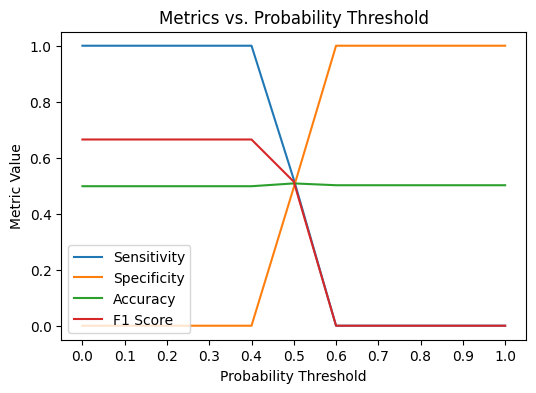

In [114]:
from sklearn.metrics import confusion_matrix

# Calculate predicted probabilities for the train data
train_probabilities = xgb_classifier.predict_proba(X_train)[:, 1]

# Apply different thresholds to obtain binary predictions for train data
thresholds = np.arange(0, 1.1, 0.1)
sensitivity = []
specificity = []
accuracy = []
f1_scores = []

for threshold in thresholds:
    train_predictions = (train_probabilities >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_train, train_predictions).ravel()
    sensitivity.append(tp / (tp + fn))
    specificity.append(tn / (tn + fp))
    accuracy.append((tp + tn) / (tp + tn + fp + fn))
    f1_scores.append(f1_score(y_train, train_predictions))

# Plot the sensitivity, specificity, accuracy, and F1 score against probability thresholds
plt.figure(figsize=(6,4))
plt.plot(thresholds, sensitivity, label='Sensitivity')
plt.plot(thresholds, specificity, label='Specificity')
plt.plot(thresholds, accuracy, label='Accuracy')
plt.plot(thresholds, f1_scores, label='F1 Score')
plt.xlabel('Probability Threshold')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.ylabel('Metric Value')
plt.title('Metrics vs. Probability Threshold')
plt.legend(loc='lower left')
plt.show()

The graph indicates that 0.5 is the best threshold point, where accuracy, sensitivity, specificity, and F1 score are all stable.

In [115]:
# Calculate evaluation metrics for train data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='macro')
train_recall = recall_score(y_train, y_train_pred, average='macro')
train_f1_score = f1_score(y_train, y_train_pred, average='macro')

# Predict on the test data
y_test_pred = xgb_classifier.predict(X_test)

# Calculate evaluation metrics for test data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='macro')
test_recall = recall_score(y_test, y_test_pred, average='macro')
test_f1_score = f1_score(y_test, y_test_pred, average='macro')

# Create a DataFrame to store the evaluation metrics
metrics_data = {
    'Dataset': ['Train', 'Test'],
    'Accuracy': [train_accuracy, test_accuracy],
    'Precision': [train_precision, test_precision],
    'Recall': [train_recall, test_recall],
    'F1-score': [train_f1_score, test_f1_score]
}

metrics_df = pd.DataFrame(metrics_data)
metrics_df

,Dataset,Accuracy,Precision,Recall,F1-score
0,Train,0.651563,0.651931,0.651466,0.651259
1,Test,0.504850,0.504907,0.504906,0.504845


In [116]:
from sklearn.metrics import confusion_matrix

# Calculate predictions for the training set using a threshold of 0.50
train_predictions = (xgb_classifier.predict_proba(X_train)[:, 1] >= 0.50).astype(int)
train_confusion_matrix = confusion_matrix(y_train, train_predictions)

# Calculate predictions for the test set using a threshold of 0.50
test_predictions = (xgb_classifier.predict_proba(X_test)[:, 1] >= 0.50).astype(int)
test_confusion_matrix = confusion_matrix(y_test, test_predictions)

# Calculate the total number of samples in each set
train_total = len(y_train)
test_total = len(y_test)

# Calculate the confusion matrix in percentage form for the training set
train_confusion_matrix_percent = train_confusion_matrix / train_total * 100

# Calculate the confusion matrix in percentage form for the test set
test_confusion_matrix_percent = test_confusion_matrix / test_total * 100

# Create a dataframe for the confusion matrix
confusion_matrix_df = pd.DataFrame({'Training Set': train_confusion_matrix_percent.flatten(),
                                    'Test Set': test_confusion_matrix_percent.flatten()},
                                   index=['True Positive (%)', 'True Negative (%)', 'False Positive (%)', 'False Negative (%)', ])
#
confusion_matrix_df

,Training Set,Test Set
True Positive (%),24.78625,25.085
True Negative (%),25.39125,25.310
False Positive (%),23.78375,24.205
False Negative (%),26.03875,25.400


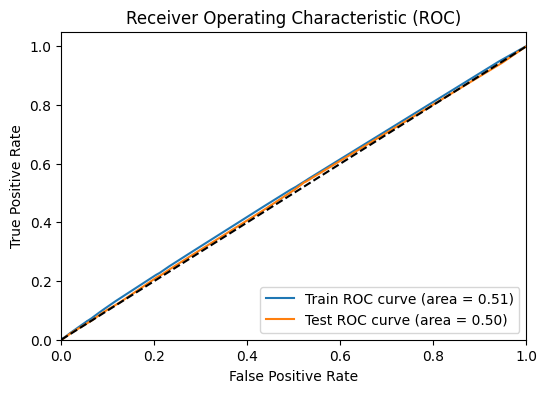

In [117]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Calculate predicted probabilities for the train data
train_probabilities = xgb_classifier.predict_proba(X_train)[:, 1]

# Apply the threshold of 0.50 to obtain binary predictions for train data
train_predictions = (train_probabilities >= 0.50).astype(int)

# Calculate the false positive rate, true positive rate, and thresholds for train data
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, train_probabilities)

# Calculate the ROC-AUC score for train data
roc_auc_train = roc_auc_score(y_train, train_predictions)

# Calculate predicted probabilities for the test data
test_probabilities = xgb_classifier.predict_proba(X_test)[:, 1]

# Apply the threshold of 0.50 to obtain binary predictions for test data
test_predictions = (test_probabilities >= 0.50).astype(int)

# Calculate the false positive rate, true positive rate, and thresholds for test data
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, test_probabilities)

# Calculate the ROC-AUC score for test data
roc_auc_test = roc_auc_score(y_test, test_predictions)

# Plot the ROC curves
plt.figure(figsize=(6,4))
plt.plot(fpr_train, tpr_train, label='Train ROC curve (area = {:.2f})'.format(roc_auc_train))
plt.plot(fpr_test, tpr_test, label='Test ROC curve (area = {:.2f})'.format(roc_auc_test))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

### Important Features in Model Building

In [118]:
feature_importance_df

,Feature,Importance
0,Churn_History_Count,0.152454
1,Monthly_Bill,0.149973
2,Billing_to_Usage_Ratio,0.147522
3,Usage_Per_Billing_Cycle,0.137945
4,Total_Usage_GB,0.129485
5,Age,0.107590
6,Tenure_Years,0.050268
7,Subscription_Length_Months,0.050161
8,Location,0.042758
9,Gender,0.019041


### Save model in a pickle file

In [119]:
import joblib


joblib.dump(xgb_classifier, 'customer_churn_classifier.pkl')

['customer_churn_classifier.pkl']